# 1.初步处理

In [1]:
import pandas as pd

file_path = '筛选add1.csv'
data = pd.read_csv(file_path)

data

,Unnamed: 0,X2,X3,X5,X9,"Y(1=default, 0=non-default)"
0,0,6,4,5,1,0
1,1,48,2,1,1,1
2,2,12,4,1,1,0
3,3,42,2,1,2,0
4,4,24,3,1,4,1
...,...,...,...,...,...,...
995,995,12,2,1,1,0
996,996,30,2,1,2,0
997,997,12,2,1,3,0
998,998,45,2,1,4,1


# 2.计算odds值

In [2]:
data['odds'] = 0.035 * data['X2'] - 0.466 * data['X3'] - 0.313 * data['X5'] + 0.189 * data['X9']
data.to_csv('筛选add1.csv', index=True)

data

,Unnamed: 0,X2,X3,X5,X9,"Y(1=default, 0=non-default)",odds
0,0,6,4,5,1,0,-3.030
1,1,48,2,1,1,1,0.624
2,2,12,4,1,1,0,-1.568
3,3,42,2,1,2,0,0.603
4,4,24,3,1,4,1,-0.115
...,...,...,...,...,...,...,...
995,995,12,2,1,1,0,-0.636
996,996,30,2,1,2,0,0.183
997,997,12,2,1,3,0,-0.258
998,998,45,2,1,4,1,1.086


# 3.绘制分数统计图

<Figure size 1200x800 with 0 Axes>

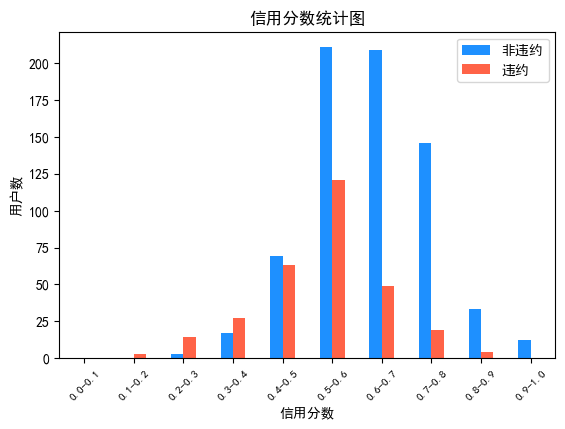

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('打印.csv')

# 中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 将SCORE划分成间隔0.1的区间
score_bins = [i/10 for i in range(11)]
df['SCORE_interval'] = pd.cut(df['SCORE'], bins=score_bins, labels=[f"{start:.1f}-{end:.1f}" for start, end in zip(score_bins[:-1], score_bins[1:])])

# 统计
grouped = df.groupby(['SCORE_interval', 'Y(1=default, 0=non-default)']).size().unstack(fill_value=0)

# 绘图
plt.figure(figsize=(12, 8))
ax = grouped.plot(kind='bar', stacked=False, color=['dodgerblue', '#FF6347'])
plt.xlabel('信用分数')
plt.ylabel('用户数')
plt.title('信用分数统计图')
plt.xticks(rotation=45, fontsize=8)
plt.subplots_adjust(bottom=0.2)
plt.legend(labels=['非违约', '违约'])

plt.savefig('信用分数统计.png')
plt.show()